In [1]:
%load_ext autoreload
%autoreload 2
import os
import numpy as np
import pandas as pd
import datetime as dt
from src.models.game_set import GameSetModel
pd.options.display.float_format = '{:.2f}'.format

In [2]:
os.environ['BETFAIR_USERNAME'] = 'Westermann'
os.environ['BETFAIR_PASSWORD'] = 'JavisM0m'
os.environ['BETFAIR_API_KEY'] = 'UPKD93WPOSKJWPq5'
os.environ['BETFAIR_API_CERTS_DIR'] = '/Users/jonaspaulwestermann/Dev/marchmadness/certs/'

In [3]:
gsm = GameSetModel()

Fit Features Loaded: (2117, 54)
Pred Features Loaded: (5, 54)


In [4]:
gsm.get_prediction_table().dropna()

,eventName,sortPriority,runnerName,external_id,price_min,price_max,price_std,price_mean,pred,E(r)
8,Yale @ Pennsylvania,1,Yale,1463,2.78,3.45,0.36,3.11,0.63,2.17
9,Yale @ Pennsylvania,2,Pennsylvania,1342,1.41,1.56,0.08,1.48,0.37,0.58


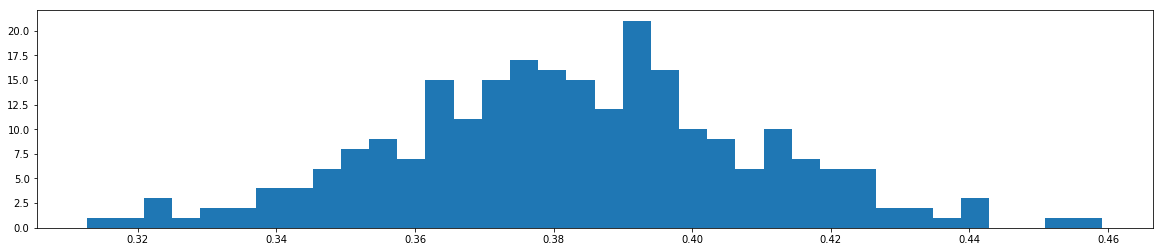

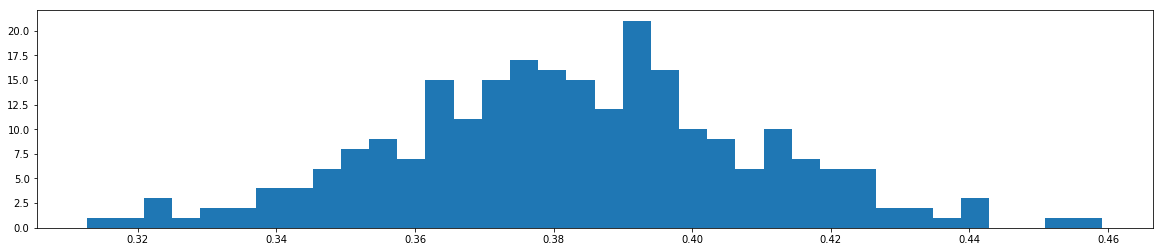

,log_loss,ncaa_log_loss
mean,0.38,0.38
std,0.03,0.03
min,0.31,0.31
max,0.46,0.46


In [5]:
gsm.model.cross_validate(n=250, n_splits=5, show_hist=True, estimator_params={'max_depth': 7, 'subsample':.8})